<a href="https://colab.research.google.com/github/lilianabs/50DaysOfDeepLearning/blob/main/Day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
type(X_train_full)

numpy.ndarray

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

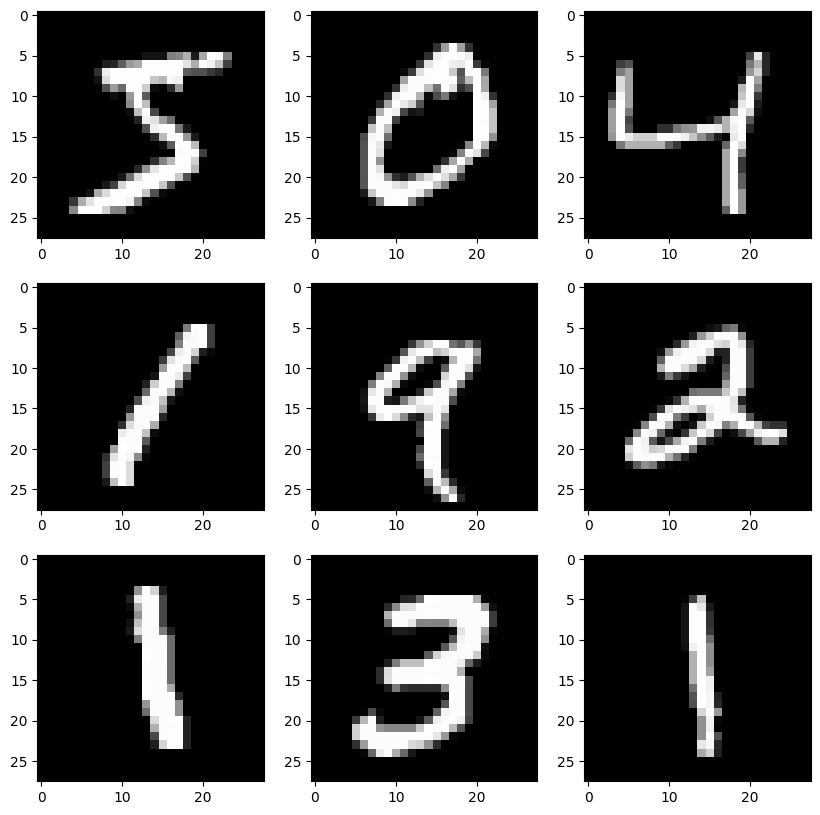

In [7]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
a=0

for i in range(3):
  for j in range(3):
    axes[i, j].imshow(X_train_full[a], cmap=plt.get_cmap('gray'))
    a = a + 1

plt.show()

In [8]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:] / 255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [9]:
classes_names = [str(i) for i in range(10)]
classes_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [10]:
classes_names[y_train[1]]

'3'

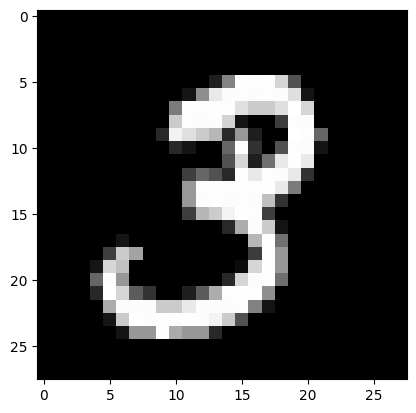

In [11]:
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))

In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.layers

In [15]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
X_train.shape

(55000, 28, 28)

In [17]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), batch_size=32)

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.6027 - accuracy: 0.8452 - val_loss: 0.3057 - val_accuracy: 0.9158
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2860 - accuracy: 0.9183 - val_loss: 0.2433 - val_accuracy: 0.9330
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2333 - accuracy: 0.9337 - val_loss: 0.2006 - val_accuracy: 0.9434
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1993 - accuracy: 0.9431 - val_loss: 0.1740 - val_accuracy: 0.9526
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1734 - accuracy: 0.9503 - val_loss: 0.1573 - val_accuracy: 0.9558
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1532 - accuracy: 0.9567 - val_loss: 0.1421 - val_accuracy: 0.9600
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1373 - accuracy: 0.9616 - val_loss: 0.1305 - val_accuracy

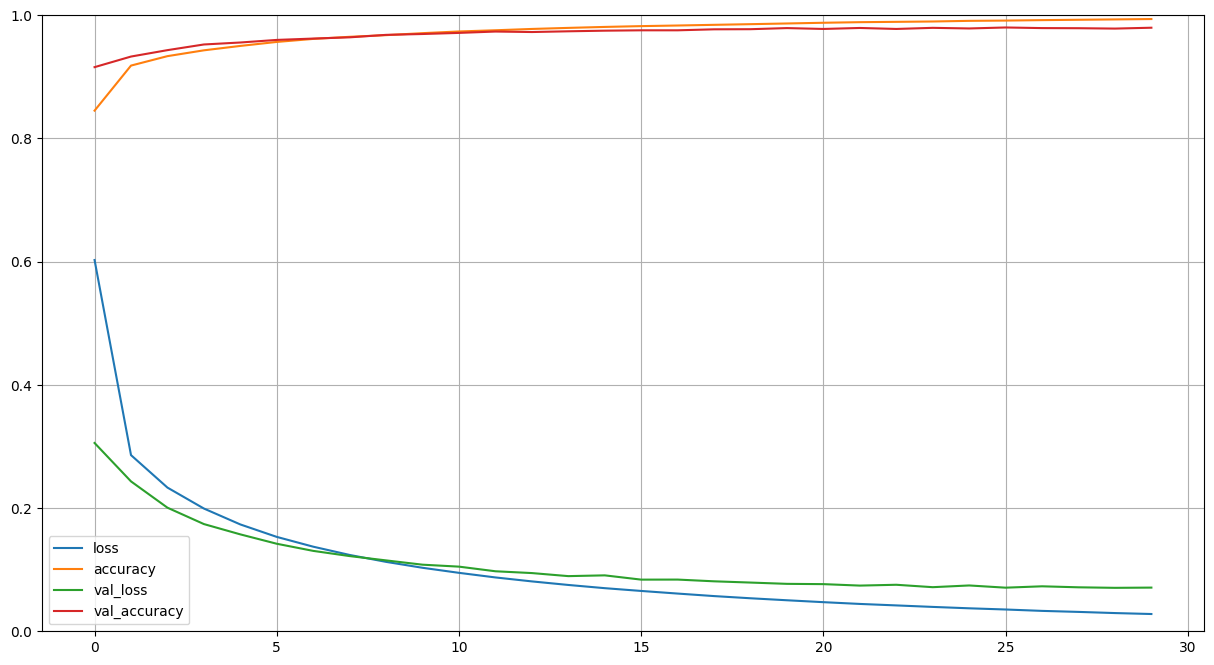

In [18]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [19]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0730 - accuracy: 0.9776


[0.07295694202184677, 0.9775999784469604]

In [20]:
y_prob = model.predict(X_test)
y_classes = y_prob.argmax(axis=-1)
y_classes

313/313 [==============================] - 2s 4ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [21]:
confusion_matrix = tf.math.confusion_matrix(y_test, y_classes)

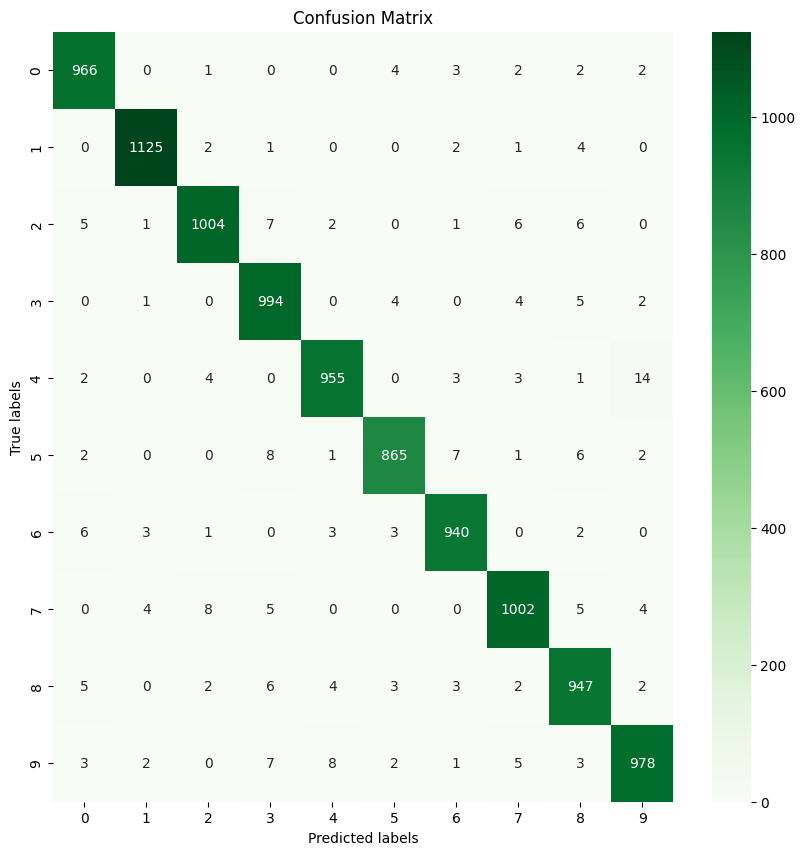

In [22]:
import seaborn as sns

fig = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Greens')

fig.set_xlabel('Predicted labels')
fig.set_ylabel('True labels')
fig.set_title('Confusion Matrix')
fig.xaxis.set_ticklabels(classes_names)
fig.yaxis.set_ticklabels(classes_names)
fig.figure.set_size_inches(10, 10)

plt.show()